In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calfornia_data = fetch_california_housing()
calfornia_df=pd.DataFrame(data=calfornia_data.data, columns=calfornia_data.feature_names)
print(calfornia_df.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [3]:
calfornia_df['target'] = calfornia_data.target 

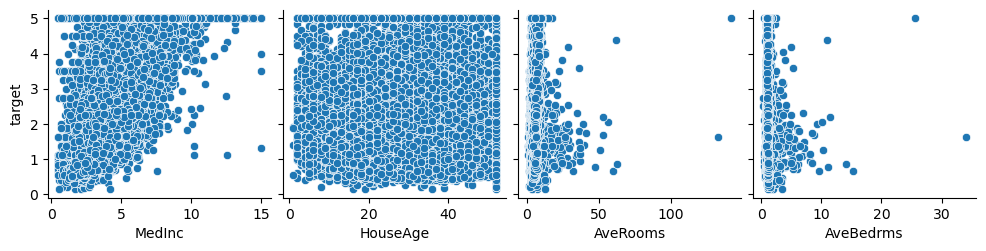

In [4]:
sns.pairplot(calfornia_df, x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'], y_vars='target')
plt.show()

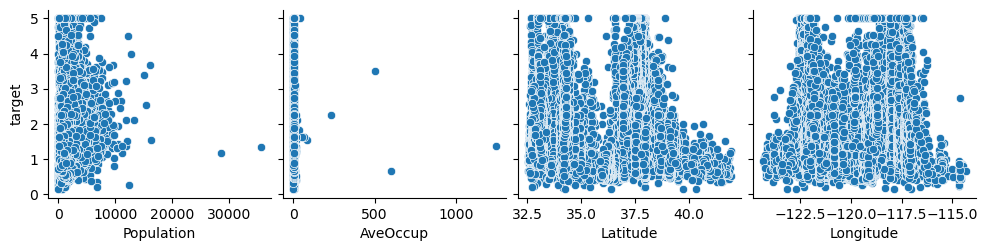

In [5]:
sns.pairplot(calfornia_df, x_vars=['Population','AveOccup','Latitude','Longitude'], y_vars='target')
plt.show()

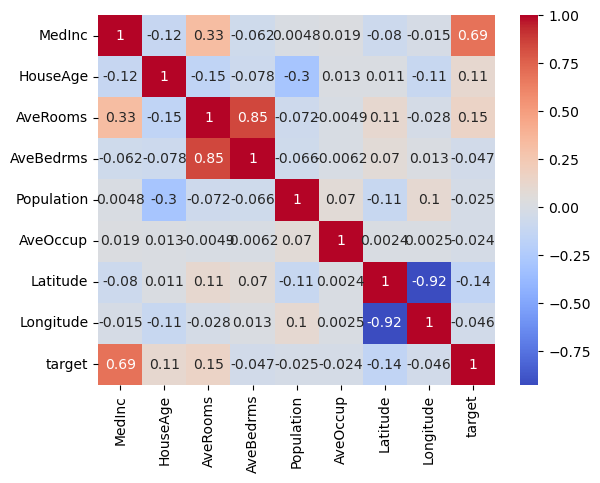

In [6]:
correlation_data = calfornia_df.corr()
sns.heatmap(correlation_data, cmap='coolwarm', annot=True)
plt.show()

# Based on pairplot and correlation, using MedInc as single feature

In [7]:
X = calfornia_df['MedInc'].values
X = X.reshape(len(X), 1)
Y = calfornia_data.target
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

(20640, 1) (20640, 1)


In [8]:
# Initialize weight and add one feature of value 1 for bias
W = np.array([[0.2],[0.6]])
X = np.c_[X, np.ones(X.shape[0])]
print(W.shape, X.shape)

(2, 1) (20640, 2)


In [9]:
# function to predict output
def prediction(X, W):
    return np.dot(X, W)

In [10]:
# calculate loss
def loss_function(Y, Y_):
    return np.mean(np.square(Y - Y_))

In [11]:
# Calculate Gradient
def gradient(X, Y, Y_):
    return -2*(np.dot(X.T, Y-Y_))/X.shape[0]

In [12]:
# Training the weights
epoc = 1000
learning_rate = 0.001
loss_limit = 0.0001
for each in range(epoc):
    Y_=prediction(X, W)
    loss = loss_function(Y, Y_)
    print(f"loss at epoc {each} is {loss}")
    grad = gradient(X, Y, Y_)
    W = W - learning_rate * grad
    if loss < loss_limit:
        break
print(f'Final updated weight: {W}')

loss at epoc 0 is 1.3547801585454116
loss at epoc 1 is 1.3055381650469309
loss at epoc 2 is 1.2600438343986753
loss at epoc 3 is 1.2180119144296433
loss at epoc 4 is 1.179178864868775
loss at epoc 5 is 1.1433012047489275
loss at epoc 6 is 1.110153985597797
loss at epoc 7 is 1.0795293808415511
loss at epoc 8 is 1.0512353825756544
loss at epoc 9 is 1.0250945975306767
loss at epoc 10 is 1.0009431346828677
loss at epoc 11 is 0.9786295775339849
loss at epoc 12 is 0.9580140346157985
loss at epoc 13 is 0.93896726226521
loss at epoc 14 is 0.9213698541691377
loss at epoc 15 is 0.905111492596993
loss at epoc 16 is 0.8900902566254175
loss at epoc 17 is 0.8762119830173287
loss at epoc 18 is 0.8633896757474995
loss at epoc 19 is 0.85154296047196
loss at epoc 20 is 0.8405975805203252
loss at epoc 21 is 0.8304849312505472
loss at epoc 22 is 0.8211416298461437
loss at epoc 23 is 0.8125091178582032
loss at epoc 24 is 0.8045332939998147
loss at epoc 25 is 0.7971641748902549
loss at epoc 26 is 0.79035558

loss at epoc 689 is 0.7051862790845215
loss at epoc 690 is 0.7051832628216012
loss at epoc 691 is 0.7051802488022203
loss at epoc 692 is 0.7051772370247104
loss at epoc 693 is 0.7051742274874038
loss at epoc 694 is 0.7051712201886341
loss at epoc 695 is 0.7051682151267364
loss at epoc 696 is 0.7051652123000468
loss at epoc 697 is 0.7051622117069026
loss at epoc 698 is 0.7051592133456428
loss at epoc 699 is 0.7051562172146069
loss at epoc 700 is 0.7051532233121364
loss at epoc 701 is 0.7051502316365733
loss at epoc 702 is 0.7051472421862615
loss at epoc 703 is 0.7051442549595456
loss at epoc 704 is 0.7051412699547718
loss at epoc 705 is 0.7051382871702873
loss at epoc 706 is 0.7051353066044406
loss at epoc 707 is 0.7051323282555816
loss at epoc 708 is 0.7051293521220612
loss at epoc 709 is 0.7051263782022315
loss at epoc 710 is 0.7051234064944458
loss at epoc 711 is 0.7051204369970592
loss at epoc 712 is 0.7051174697084274
loss at epoc 713 is 0.7051145046269073
loss at epoc 714 is 0.705

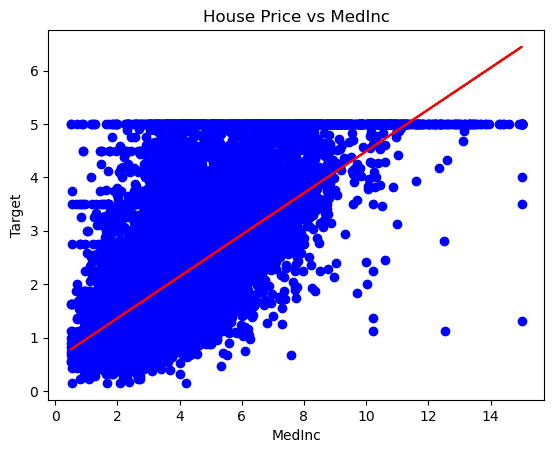

In [30]:
plt.scatter(X[:,0], Y[:,0], color='blue')
plt.plot(X[:,0], Y_[:, 0], color='red')
plt.title("House Price vs MedInc")
plt.xlabel("MedInc")
plt.ylabel("Target")
plt.show()